# Figures and Tables

- The main parameters are pass to the python scripts via a yaml file by command line
- the script may have some command line arguments, for example to give the name of an ouput file when it may have one
- du to very long run time, espescially for the adjustement on cut and flow experiments, some figures are simply from csv files with results
- how ever un example, figure 2-B, is given with a reasonnable run time of about 20 minutes, other adjustment may then be trid by changing the architecture file name in the yaml file
- still to get reasonnable run time some shortest sets of data have be used (e.i. for Figure 5 and supplemental figure 6), but the full set may be used by uncomment a line in the python script)

In [2]:
import sys; print('Python %s on %s' % (sys.version, sys.platform))
sys.path.extend(['../src', '../test', '../example'])
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Python 3.8.12 | packaged by conda-forge | (default, Oct 12 2021, 21:59:51) 
[GCC 9.4.0] on linux


### Figure 1-B:
- see end of simulation_fig-1B-3C-6E-7B.py to adjust picture size, and visual radius of the root

plant-1.txt 1.0


Application.setStyle(Fusion)


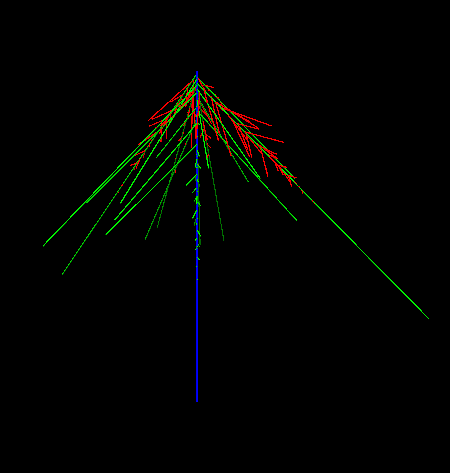

In [3]:
%run simulation_fig-1B-3C-6E-7B.py parameters_fig-1B.yml --prop order

# Figure 2
### Figure 2-A

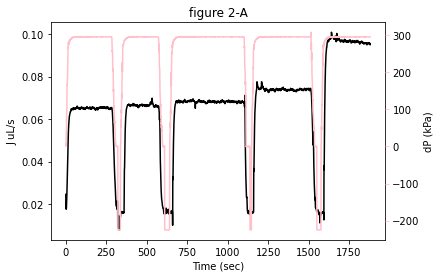

In [5]:
draw = pd.read_csv("data_figures/fig_2-A.csv", sep = ';')
fig = {}
ax5 = {}
ax6 = {}

fig = plt.figure()
ax5 = fig.add_subplot(111, label = "1")
draw.plot.line('Time (sec)', 'FLOW (?L.s-1)', c = 'black', ax = ax5)
ax5.set_title('figure 2-A')
ax5.set_ylabel('J uL/s')
ax6 = fig.add_subplot(111, label = "2", frame_on = False)
ax5.get_legend().remove()
draw.plot.line('Time (sec)', 'Pressure (kPa)', ax = ax6, color = 'pink')
ax6.yaxis.tick_right()
ax6.yaxis.set_label_position('right')
ax6.set_ylabel('dP (kPa)')
ax6.get_xaxis().set_visible(False)
ax6.tick_params(axis = 'y', color = "pink")
ax6.get_legend().remove()

### Figure 2-B: 
- run the adjustment of K and k see file parameters_fig-2-B.yml for the initial guesses of these parameters
- run time is around 20 minutes

Simulation runs:  1
#############################
finished minimize ax, ar       fun: 4.8828008046912096e-05
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 9.02094015e-06, -6.94380674e-07])
  message: 'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 36
      nit: 10
     njev: 12
   status: 0
  success: True
        x: array([0.61020848, 5.7837016 ])
*******************************************************************************


/home/fabrice/miniconda2/envs/hydroroot3/lib/python3.8/site-packages/scipy/optimize/optimize.py:282: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "


finished minimize Kx      fun: 6.945937548233918e-10
     jac: array([-5.90800684e-05, -1.71418864e-04, -2.71816317e-04, -7.61970134e-04,
       -9.92031455e-04, -2.77793934e-04, -1.11403983e-04, -8.61957204e-04,
       -2.27564250e-04])
 message: 'Optimization terminated successfully'
    nfev: 253
     nit: 24
    njev: 24
  status: 0
 success: True
       x: array([0.00047371, 0.00019327, 0.00052036, 0.0003354 , 0.00046673,
       0.0024571 , 0.00343671, 0.00274265, 0.00127265])
Simu,  601.5049667084518 1.3327101531260848e-10 601.9238958820997 dk0 =  0.17550165253334504 dKx =  3.5815476958462954e-06
finished minimize Kx      fun: 1.0235507517735802e-10
     jac: array([-3.34248816e-05, -2.14819139e-05,  1.49795231e-05,  2.73097200e-05,
       -2.85809820e-04, -1.19857727e-04, -3.73311087e-05, -1.57034561e-04,
       -4.76678046e-05])
 message: 'Optimization terminated successfully'
    nfev: 14
     nit: 1
    njev: 1
  status: 0
 success: True
       x: array([0.00047375, 0.0001932

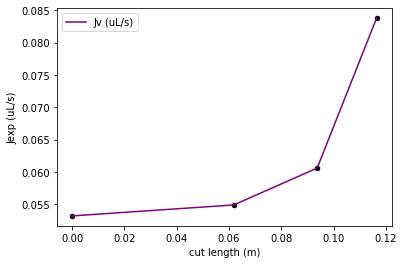

In [6]:
%run adjustement_K_and_k.py parameters_fig-2-B.yml -op

### Figure 2-C
- because of run time that may be hight the whole set of adjustment in this notebook is not propose
- instead the final results is display from a csv file
- however the user may reproduce them by changing the input_file name in parameters_fig-2-B.yml keeping the same initial guesses for k and K

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

Text(0.5, 1.0, 'fig-2-C')

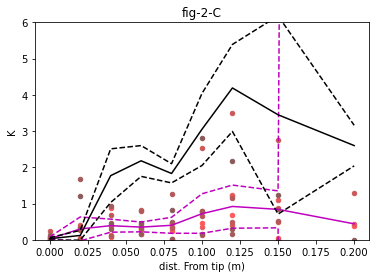

In [14]:
draw = pd.read_csv("data_figures/fig_2-C.csv", sep = ',', dtype = 'float')
ax = draw.plot('x K median', 'mediancurve from cut and flow measurements',c='m')
draw.plot('x K median', 'median -t*SE', c='m', ax=ax, style='--')
draw.plot('x K median', 'median + t*SE', c='m', ax=ax, style='--')
for i in range(0,20,2):
    color = [1.0-float(i)/40.0,0.35,0.35]
    draw.plot.scatter(i,i+1, ax = ax, color = color, edgecolor = color)
ax.set_ylim(0.0, 6.0)
draw.plot('dist. From tip (m)', 'K lowess from Poiseuille\'s law on xylem', c='k', ax=ax)
draw.plot('dist. From tip (m)', 'Unnamed: 31', c='k', ax=ax, style='--')
draw.plot('dist. From tip (m)', 'Unnamed: 32', c='k', ax=ax, style='--')
ax.get_legend().remove()
ax.set_ylabel('K')
ax.set_title('fig-2-C')

### Figure 2-D
- as written in the article draft:
    - Poiseuille value are k obtain on full plants (plant-1 to plant-10) see below Table to run adjustment over the plant set and the resulting k set
    - Cut and flow are the k obtained from the previous adjustment

Text(0.5, 1.0, 'fig-2-D')

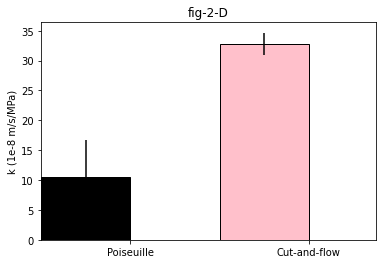

In [15]:
barwidth = 0.4
cut_n_flow = [9.86, 47.68, 71.43, 21.97, 60.15, 34.16, 10.19, 23.42, 26.62, 22.17]
se1 = np.std(cut_n_flow)/np.sqrt(len(cut_n_flow))
poiseuille = [3.39, 7.08, 8.7, 5.59, 13.12, 8.3, 19.22, 22.13, 12.76, 4.03]
se2 = np.std(poiseuille)/np.sqrt(len(poiseuille))
plt.bar(0.2, np.mean(poiseuille), width = barwidth, color = 'black', edgecolor = 'black', yerr=se1, label = 'poiseuille')
plt.bar(1.0, np.mean(cut_n_flow), width = barwidth, color = 'pink', edgecolor = 'black', yerr=se2, label = 'cut_n_flow')
plt.xlim(0,1.5)
plt.xticks([0.4, 1.2], ['Poiseuille', 'Cut-and-flow'])
plt.ylabel('k (1e-8 m/s/MPa)')
plt.title('fig-2-D')

### Table 1:
- related to fig-2-D
- simulations duration: couple of minutes

In [16]:
%run simulation_table-1.py parameters_table-1.yml

Simulation runs:  10
#############################
plant-10.txt          plant  total length (m)  surface (m2)  k (10-8 m/s/MPa)
0   plant-1.txt            1.6260      0.000463          3.393467
1   plant-2.txt            1.8761      0.000518          7.081622
2   plant-3.txt            1.5992      0.000448          8.699297
3   plant-4.txt            0.7099      0.000220          5.586774
4   plant-5.txt            1.8824      0.000510         13.124087
5   plant-6.txt            1.1174      0.000336          8.298469
6   plant-7.txt            2.1262      0.000603         19.224790
7   plant-8.txt            2.1082      0.000605         22.132164
8   plant-9.txt            1.1336      0.000360         12.764829
9  plant-10.txt            0.7824      0.000259          6.305533


### Figure 3-A and 3-B

Text(0.5, 1.0, 'fig-3-B')

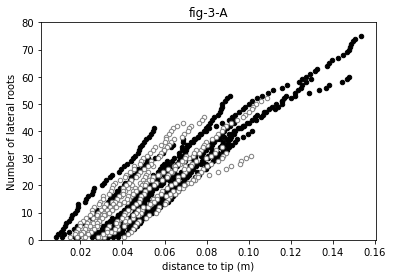

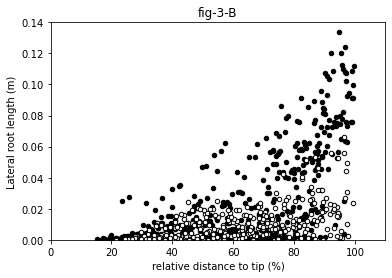

In [18]:
df3a = pd.read_csv("data_figures/fig-3-A.csv", sep = ',', dtype = 'float')
df3a.iloc[:,range(0,43,2)]=df3a.iloc[:,range(0,43,2)]/1000
ax = df3a.plot.scatter(0,1,marker='o',c='black',edgecolor ='black')
for i in range(2,26,2):
    df3a.plot.scatter(i,i+1,marker='o',c='black',edgecolor ='black',ax=ax)
for i in range(26,43,2):
    df3a.plot.scatter(i,i+1,marker='o',c='white',edgecolor ='grey',ax=ax)
# ax.set_xlim(0,0.16)
ax.set_ylim(0,80)
ax.set_ylabel('Number of lateral roots')
ax.set_xlabel('distance to tip (m)')
ax.set_title('fig-3-A')
df3b = pd.read_csv("data_figures/fig-3-B.csv", sep = ',', dtype = 'float')
df3b.iloc[:,[0,2]]=df3b.iloc[:,[0,2]]/1000
ax = df3b.plot.scatter(1,0,marker='o',c='black',edgecolor ='black')
df3b.plot.scatter(3,2,marker='o',c='white',edgecolor ='black',ax=ax)
ax.set_xlim(0,110)
ax.set_ylim(0,0.14)
ax.set_ylabel('Lateral root length (m)')
ax.set_xlabel('relative distance to tip (%)')
ax.set_title('fig-3-B')

### Figure 3-C
- see end of simulation_fig-1B-3C-6E-7B.py to adjust picture size, and visual radius of the root

10318687 1.0


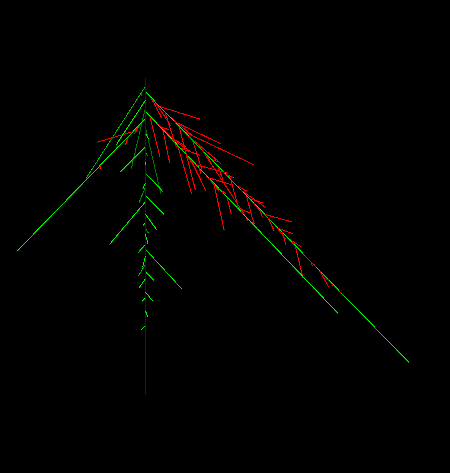

12999162 1.0


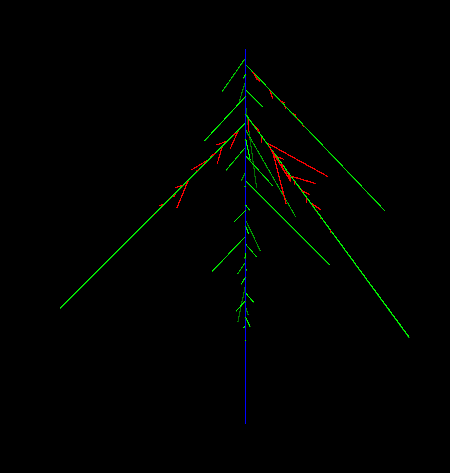

70180638 1.0


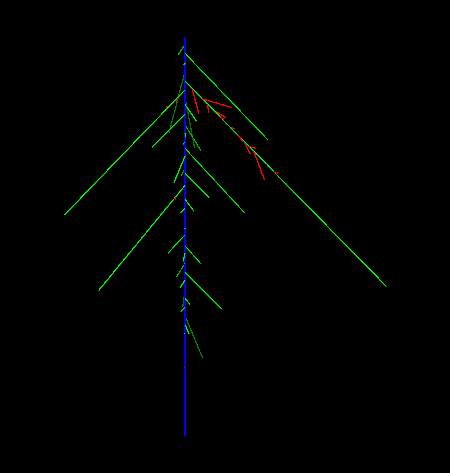

In [19]:
%run simulation_fig-1B-3C-6E-7B.py parameters_fig-3C.yml --prop order

### Figure 4-A

Text(0.5, 1.0, 'fig-4-A')

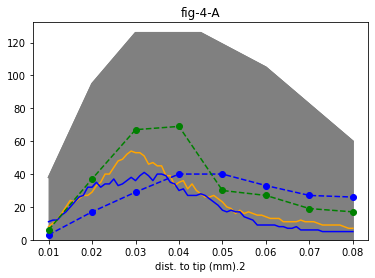

In [21]:
df4a = pd.read_csv("data_figures/fig-4-A.csv", sep = ',', dtype = 'float')
df4a.iloc[:,[0,3,6]]=df4a.iloc[:,[0,3,6]]/1e3
ax=df4a.plot(0,'all intercepts 1',c='orange')
df4a.plot(0,'all intercepts 2',c='blue',ax=ax)
df4a.plot(3,'discrete plant 3',c='blue',style='--',marker='o',ax=ax)
df4a.plot(3,'discrete plant 4',c='green',style='--',marker='o',ax=ax)
df4a.plot(6,'max sim',c='grey',ax=ax)
df4a.plot.area(6,'max sim',ax=ax,color='grey')
ax.legend().remove()
ax.set_title('fig-4-A')

### Figure 4-B

Text(0.5, 1.0, 'fig-4-B')

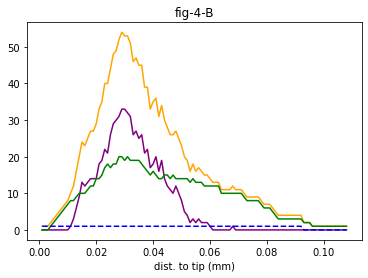

In [22]:
df4b = pd.read_csv("data_figures/fig-4-B.csv", sep = ',')
df4b.iloc[:,[0]]/=1e3
ax=df4b.plot(0,'all intercepts',c='orange')
df4b.plot(0,'intercepts order 2',c='purple',ax=ax)
df4b.plot(0,'intercepts order 1',c='green',ax=ax)
df4b.plot(0,'intercepts order 0',c='blue',style='--',ax=ax)
ax.legend().remove()
ax.set_title('fig-4-B')

### Figure 4-C

Text(0.5, 1.0, 'fig-4-C')

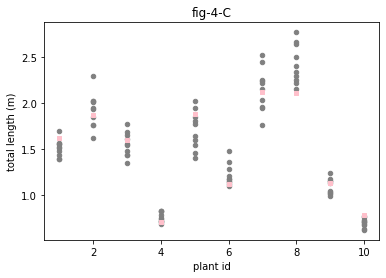

In [23]:
df4c = pd.read_csv("data_figures/fig-4-C.csv", sep = ',')
ax=df4c.plot.scatter('simulated plant id','total length simulated (m)',c='grey')
df4c.plot.scatter('plant id','total length (m)',c='pink',marker='s',edgecolor='pink',ax=ax)
ax.set_title('fig-4-C')

### Figure 5 and supplemental figure 6:
- In the saved notebook the figures correspond to a shortest subset of the generated roots used for the submetted paper for run time purpose
- with this shortest set run time is around 20 minutes against 10 times more for the complete set
- the choise of the generated root set to run may be changed at the beginning of the python script main function

Simulation runs:  952
#############################
runs done 100.0 %%running time is  960.4269633293152


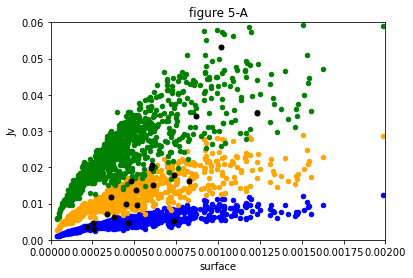

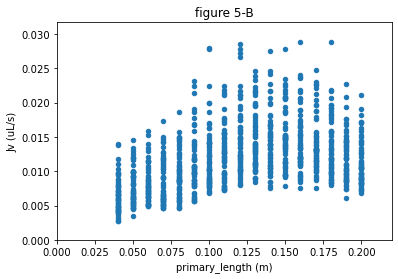

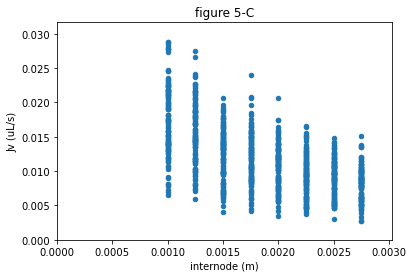

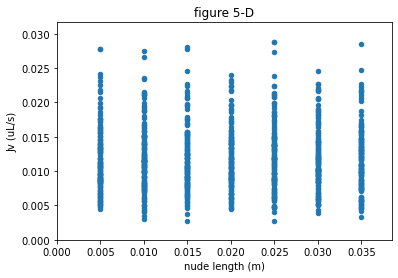

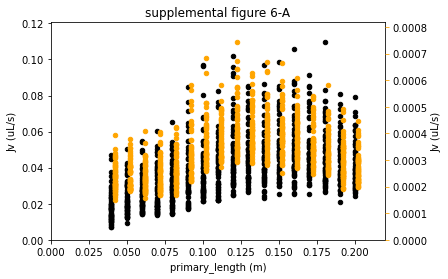

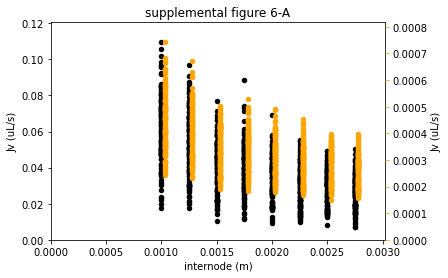

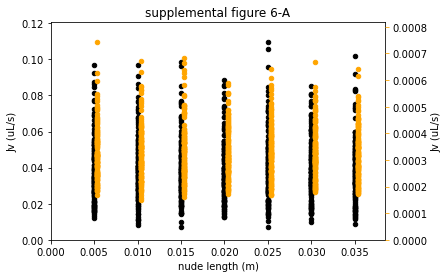

In [24]:
%run simulation_fig-5_sup-fig-6.py parameters_fig-5_sup-fig-6.yml

NOT using graph editor observer No module named grapheditor
Simulation runs:  952
#############################
runs done 100.0 %running time is  1339.45500612


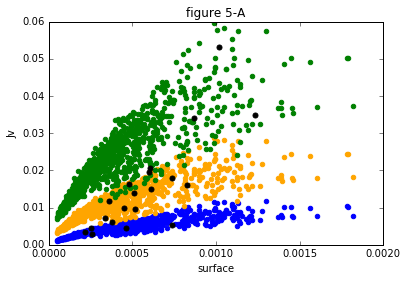

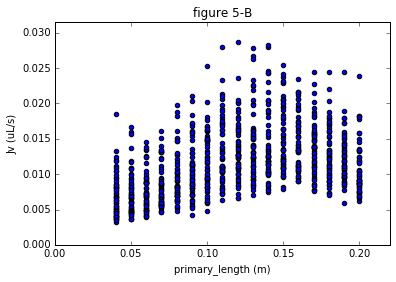

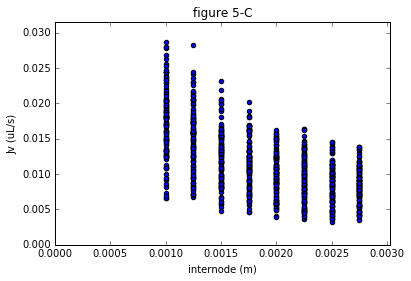

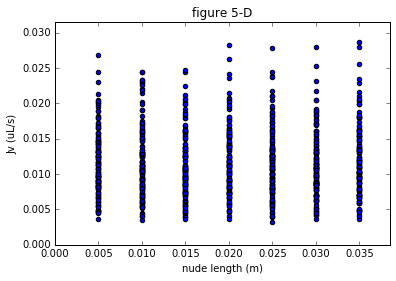

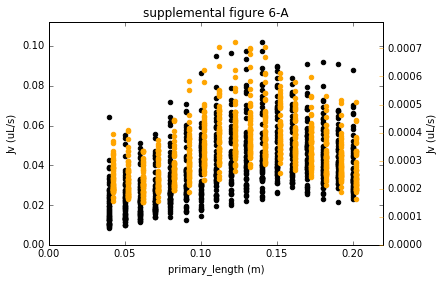

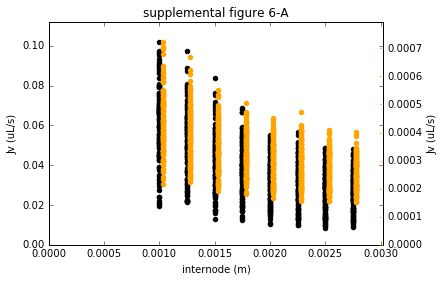

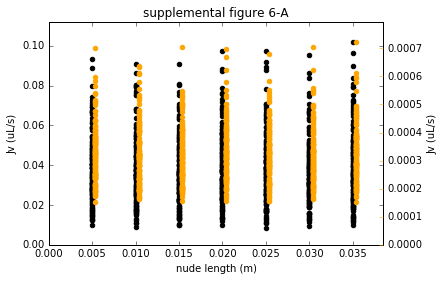

In [2]:
%run simulation_fig-5_sup-fig-6.py parameters_fig-5_sup-fig-6.yml

### Figure 6-A and supplemental figure 4
- run times: few minutes

Simulation runs:  256
#############################
1

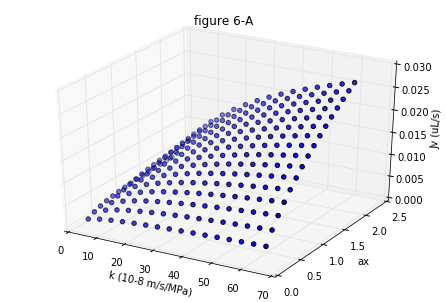

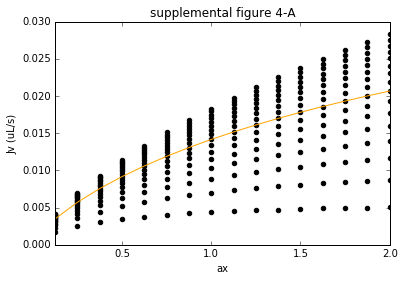

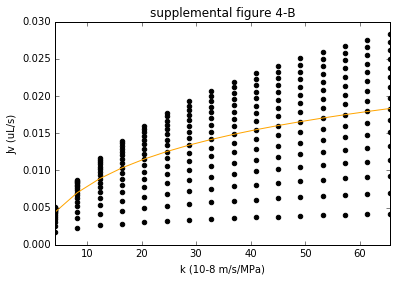

In [34]:
%run simulation_fig-6A_sup-fig4.py parameters-fig-6A_sup-fig-4.yml

### Figure 6-B and 6-C
- For run time purpose, the results in saved notebook using a shortest subset of generated root with less ax and k values than for the submitted paper
- run time with these parmeters: 50 minutes
- run time with the full set of roots, ax and k: several hours
- the choise of the generated roots set may be changed at the beginning of the python script main function
- the range of ax and k may be changed in parameters-fig-6-B-C.yml. The k value is changed by the intermediary of the factor radfold

Simulation runs:  23800
#############################
fig-6-B: runs done 100.0 %running time is  2755.74062085


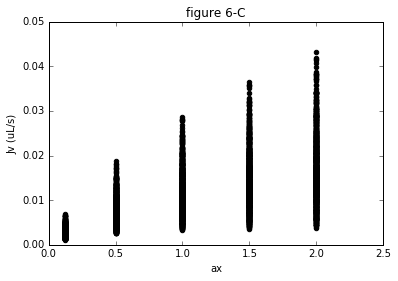

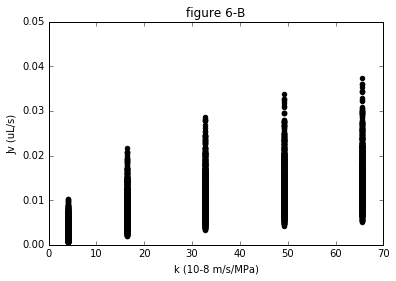

In [36]:
%run simulation_fig-6-B-C.py parameters-fig-6-B-C.yml

### Figure 6-D
- simulations duration: few minutes

Simulation runs:  20
#############################
figure 6-D
fig-6D-RSA.csv
0Simulation runs:  20
#############################
figure 6-D
fig-6D-cylindric.csv
0

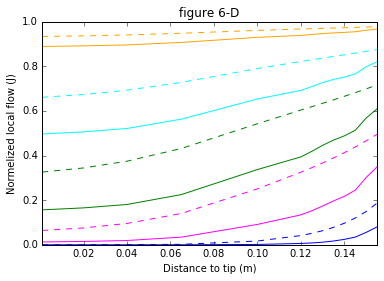

In [37]:
%run simulation_fig-6D.py parameters_fig-6D_sup-fig-5.yml

### Figure 6-E:
- see end of simulation_fig-1B-3C-6E-7B.py to adjust picture size, and visual radius of the root

plant-1.txt 0.125


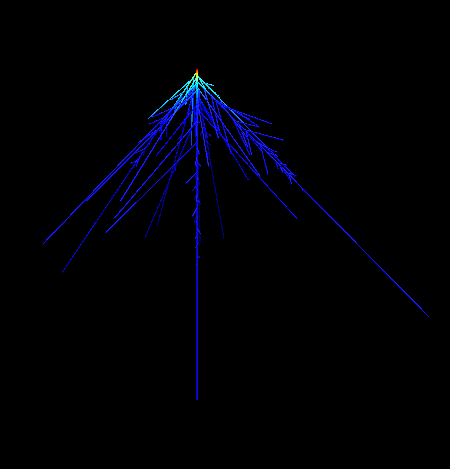

plant-1.txt 1.0


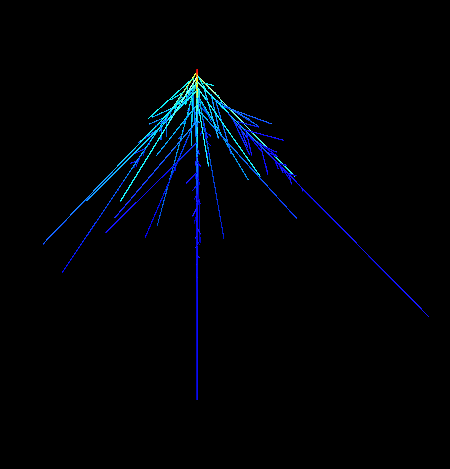

plant-1.txt 2.0


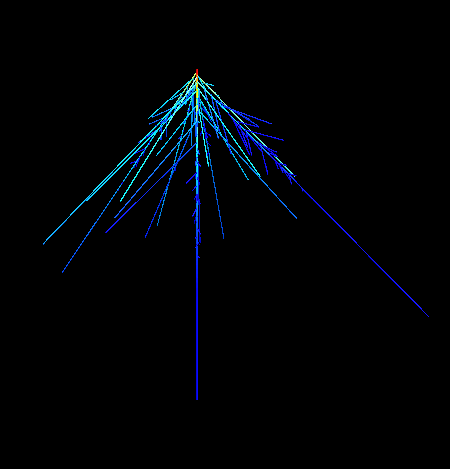

In [5]:
%run simulation_fig-1B-3C-6E-7B.py parameters-fig-6E.yml --prop j

### Figure 7-A

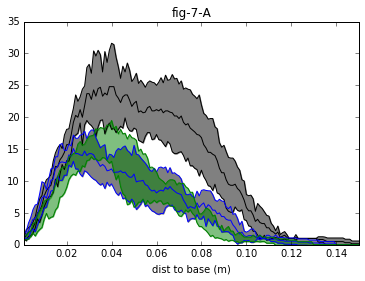

In [39]:
df7a = pd.read_csv("data_figures/fig-7-A.csv", sep = ',')
ax=df7a.plot('dist to base (m)','n Col0',c='black')
df7a.plot('dist to base (m)','95 - Col',c='black',ax=ax)
df7a.plot('dist to base (m)','95 + Col',c='black',ax=ax)
ax.fill_between(list(df7a.loc[:,'dist to base (m)']),list(df7a.loc[:,'95 - Col']),list(df7a.loc[:,'95 + Col']), color='grey')
df7a.plot('dist to base (m)','esk1-5',c='blue',ax=ax)
df7a.plot('dist to base (m)','95 - esk1-5',c='blue',ax=ax)
df7a.plot('dist to base (m)','95 + esk1-5',c='blue',ax=ax)
ax.fill_between(list(df7a.loc[:,'dist to base (m)']),list(df7a.loc[:,'95 - esk1-5']),list(df7a.loc[:,'95 + esk1-5']), color='grey')
df7a.plot('dist to base (m)','95 - esk1-1',c='green',ax=ax)
df7a.plot('dist to base (m)','95 + esk1-1',c='green',ax=ax)
ax.fill_between(list(df7a.loc[:,'dist to base (m)']),list(df7a.loc[:,'95 - esk1-1']),list(df7a.loc[:,'95 + esk1-1']), color='green', alpha=0.5)
ax.set_title('fig-7-A')
ax.set_ylim(0,35.0)
ax.legend().remove()

### Figure 7-B

plant-1.txt 1.0


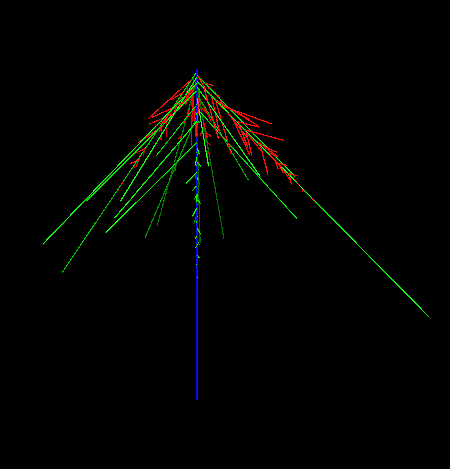

20-07-02-SD-150218-esk11-7.txt 1.0


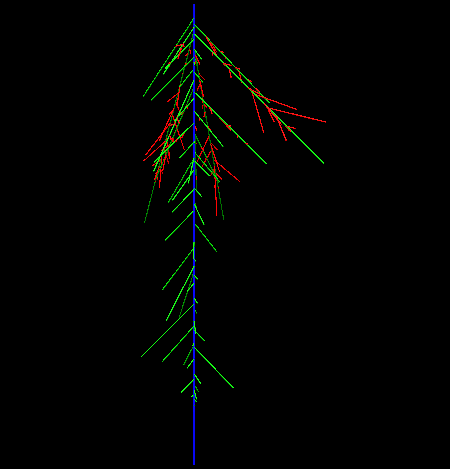

20-06-09-FB-180719-e15ch1-1.txt 1.0


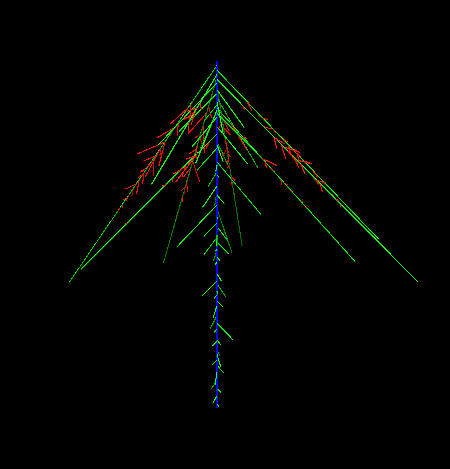

In [40]:
%run simulation_fig-1B-3C-6E-7B.py parameters_fig-7B.yml --prop order

### Figure 7-C:
- because of run time that may be hight the whole set of adjustment in this notebook is not propose
- instead the final results is display from a csv file
- see comments above for fig-2-C

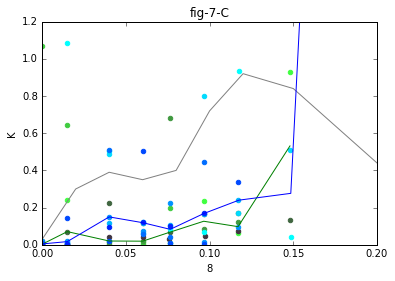

In [41]:
ax = draw.plot('x K median', 'mediancurve from cut and flow measurements',c='grey')
draw2 = pd.read_csv("data_figures/fig_7-C-e11.csv", sep = ',', dtype = np.float)
draw2.plot('x', 'median-esk1-1',c='green',ax=ax)
for i in range(0,10,2):
    color = [0.25,1.0-float(i)/10.0,0.25]
    draw2.plot.scatter(i,i+1, ax = ax, color = color, edgecolor = color)
draw3 = pd.read_csv("data_figures/fig_7-C-e15.csv", sep = ',', dtype = np.float)
draw3.plot('x', 'median esk1-5',c='blue',ax=ax)
for i in range(0,14,2):
    color = [0.,1.0-float(i)/14.0,1.]
    draw3.plot.scatter(i,i+1, ax = ax, color = color, edgecolor = color)
ax.get_legend().remove()
ax.set_ylabel('K')
ax.set_ylim(0,1.2)
ax.set_title('fig-7-C')

### Figure 7-D

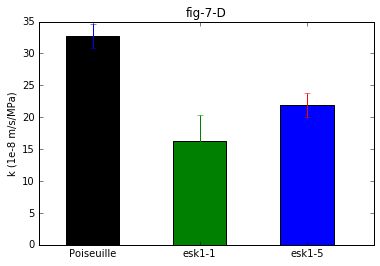

In [42]:
esk11 = [10.9, 33.6, 16.6, 10.2, 10]
se3 = np.std(esk11)/np.sqrt(len(esk11))
esk15 = [11.1, 12.7, 39.5, 9.82, 10.1, 9.69, 60.5]
se4 = np.std(esk15)/np.sqrt(len(esk15))
plt.bar(0.2, np.mean(cut_n_flow), width = barwidth, color = 'black', edgecolor = 'black', yerr=se2, label = 'cut_n_flow')
plt.bar(1.0, np.mean(esk11), width = barwidth, color = 'green', edgecolor = 'black', yerr=se3, label = 'esk1-1')
plt.bar(1.8, np.mean(esk15), width = barwidth, color = 'blue', edgecolor = 'black', yerr=se2, label = 'esk1-5')
plt.xlim(0,2.5)
plt.xticks([0.4, 1.2, 2.0], ['Poiseuille', 'esk1-1', 'esk1-5'])
plt.ylabel('k (1e-8 m/s/MPa)')
plt.title('fig-7-D')

### Supplemental Figure 1-B

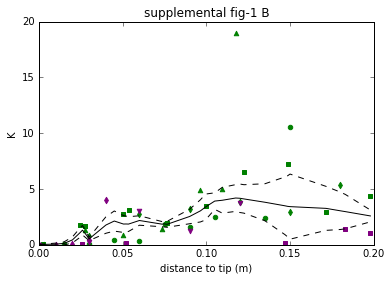

In [43]:
df1c = pd.read_csv("data_figures/sup-fig-1-C.csv", sep = ',', dtype = np.float)
marker = ['o','s','^','d','s','d','v']
colors = ['green','green','green','green','purple','purple','purple']
ax = df1c.plot('X lowess','K lowess', c='black')
df1c.plot('X lowess', 'SE -',c='black',style='--',ax=ax)
df1c.plot('X lowess', 'SE +',c='black',style='--',ax=ax)
n=0
for i in range(0,21,3):
    df1c.plot.scatter(i,i+1,marker=marker[n],c=colors[n],edgecolor =colors[n],ax=ax)
    n+=1
ax.set_xlim(0,0.2)
ax.set_ylim(0,20)
ax.get_legend().remove()
ax.set_ylabel('K')
ax.set_xlabel('distance to tip (m)')
ax.set_title('supplemental fig-1 B')

### Supplemental Figure 2

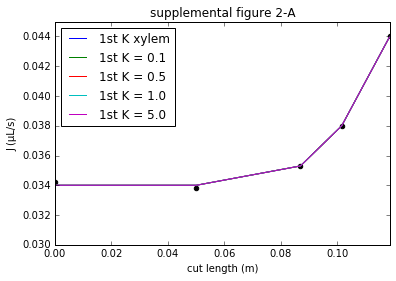

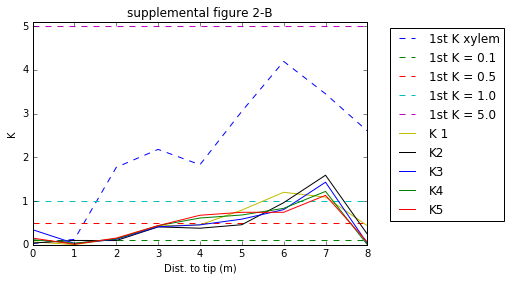

In [44]:
dsf2a = pd.read_csv("data_figures/sup-fig-2-A.csv", sep = ',', dtype = np.float)
ax = dsf2a.plot.scatter(0,1,c='black')
for i in range(1,6):
    dsf2a.plot(0,i, ax=ax)
ax.set_ylim(0.03,0.045)
ax.set_title('supplemental figure 2-A')
dsf2b = pd.read_csv("data_figures/sup-fig-2-B.csv", sep = ',', dtype = np.float)
ax2 = dsf2b.iloc[:,range(1,10,2)].plot(style='--')
dsf2b.iloc[:,range(2,11,2)].plot(ax=ax2)
ax2.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax2.set_ylim(0,5.1)
ax2.set_title('supplemental figure 2-B')
ax2.set_ylabel('K')
ax2.set_xlabel('Dist. to tip (m)')

### Supplemental Figure 3

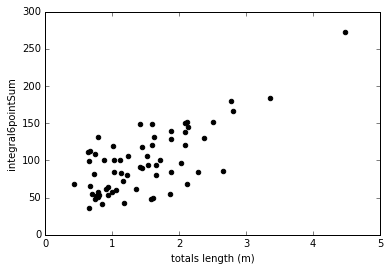

In [45]:
dfs3a = pd.read_csv("data_figures/sup-fig-3-A.csv", sep = ',')
ax=dfs3a.plot.scatter('totals length (m)','integral6pointSum',c='black')

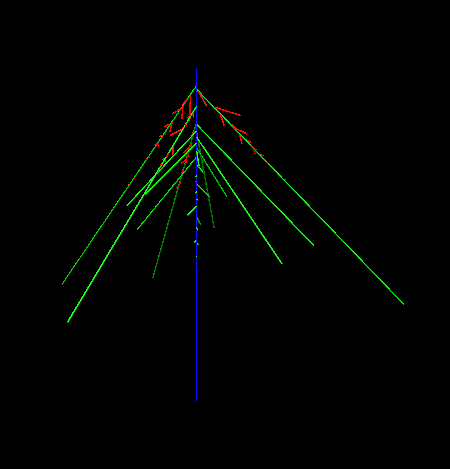

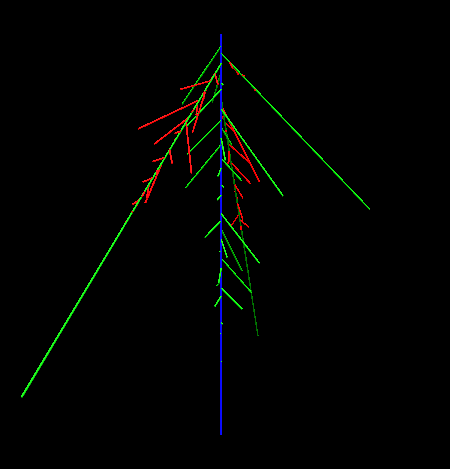

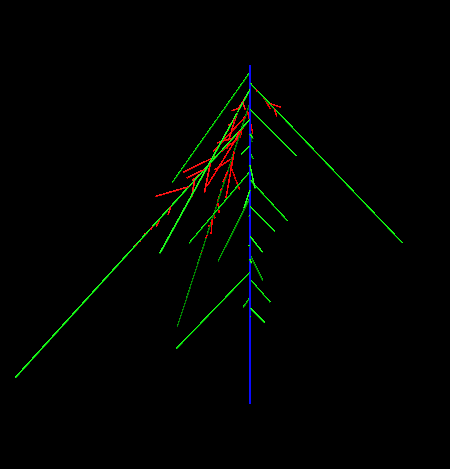

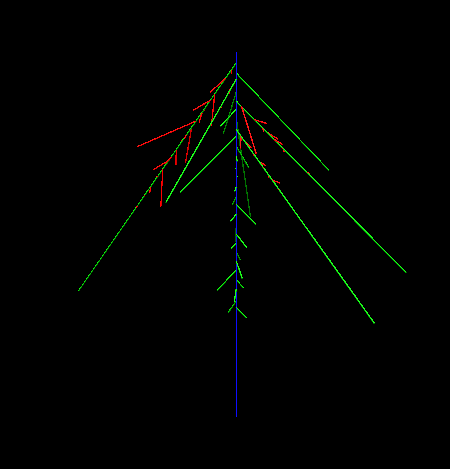

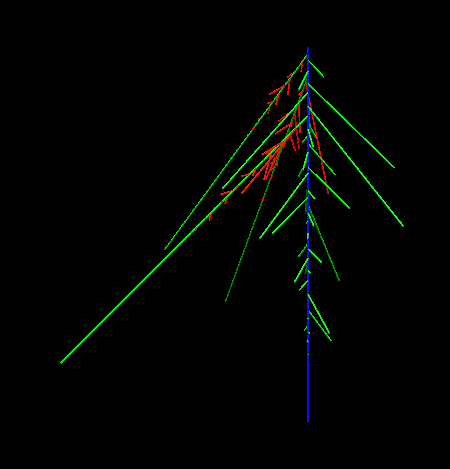

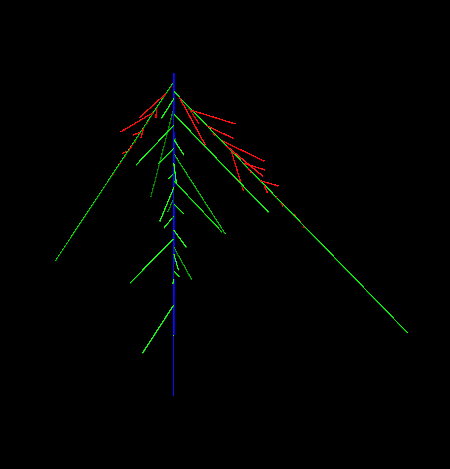

In [46]:
%run simulation_sup_fig-3-B.py parameters-sup-fig-3B.yml

### supplemental figure 5
- For run time purpose, the results in saved notebook using a shortest subset of generated root with less ax and k values than for the submitted paper
- run time with short_subset_generated-roots-20-10-07_PR_016.csv: 10 minutes
- run time with subset_generated-roots-20-10-07_PR_016.csv: at least one hour

Simulation runs:  1120
#############################
55.89 % ax =  0.75


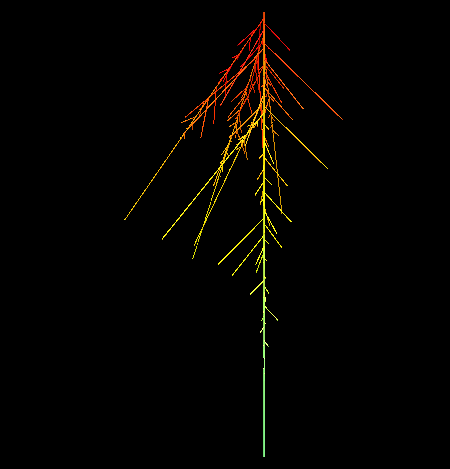

56.34 % ax =  0.5


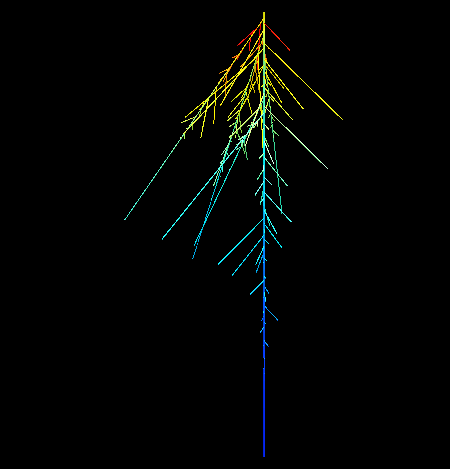

56.79 % ax =  0.25


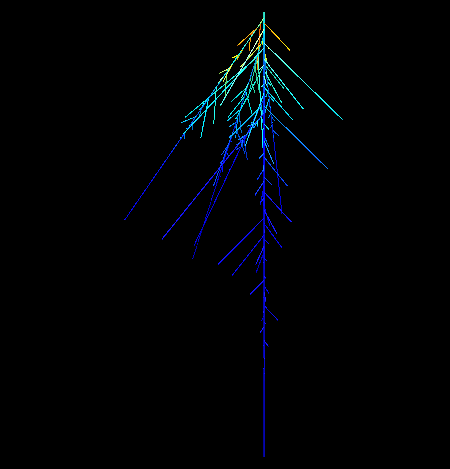

57.14 % ax =  0.05


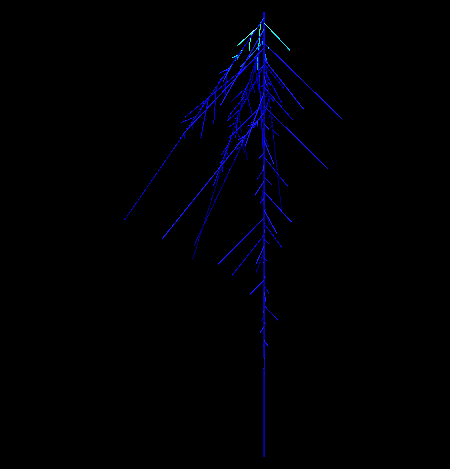

100.0 %running time is  446.913501024


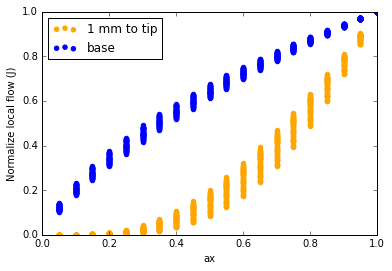

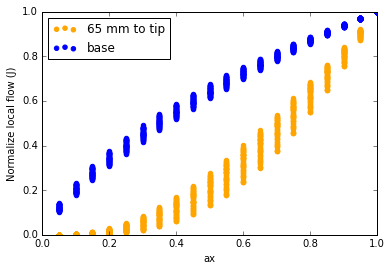

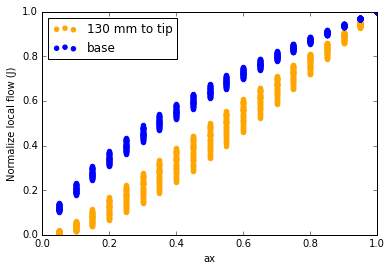

In [48]:
%run simulation_sup-fig-5.py parameters_fig-6D_sup-fig-5.yml

### supplemental Figure 7

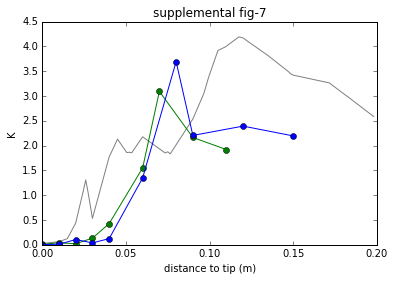

In [49]:
ax = df1c.plot('X lowess','K lowess', c='grey')
df7 = pd.read_csv("data_figures/sup-fig-7.csv", sep = ',', dtype = np.float)
df7.plot(0,1, c='green', marker='o',ax=ax)
df7.plot(3,4, c='blue', marker='o',ax=ax)
ax.set_xlim(0,0.2)
ax.set_ylim(0,4.5)
ax.get_legend().remove()
ax.set_ylabel('K')
ax.set_xlabel('distance to tip (m)')
ax.set_title('supplemental fig-7')